# Orange Juice Data Exploration in Python

In this notebook, we use Python to explore the Orange Juice dataset in R package `bayesm`. This dataset is used in the retail forecasting benchmark [OrangeJuice_Pt_3Weeks_Weekly](https://msdata.visualstudio.com/AlgorithmsAndDataScience/_git/TSPerf?path=%2Fretail_sales%2FOrangeJuice_Pt_3Weeks_Weekly&version=GBmaster) of TSPerf. 

To run this notebook, please first create and activate `tsperf` conda environment by running the following commands from `TSPerf` directory: 

`conda env create --file ./common/conda_dependencies.yml`  
`conda activate tsperf`  

Then, inside the `tsperf` environment, please run the following commands to create the jupyter notebook kernel:

``
python -m ipykernel install --name tsperf_python
``

Finally, you can launch the Jupyter notebook by running `jupyter notebook` and select the kernel named `tsperf_python` in the list of kernels under Kernel tab.

In [18]:
# import packages
import pandas as pd
import numpy as np
import os
import math
import itertools
import matplotlib.pyplot as plt

In [6]:
# read in the data
data_dir = '..\data'
sales_file = os.path.join(data_dir, 'yx.csv')
store_file = os.path.join(data_dir, 'storedemo.csv')
sales = pd.read_csv(sales_file, index_col=False)
storedemo = pd.read_csv(store_file, index_col=False)

# show first few rows of sales data
print('First few rows of sales data: \n')
print(sales.head(4))
print('\n')
# show first few rows of store demographic data
print('First few rows of store demographic data: \n')
print(storedemo.head(4))

First few rows of sales data: 

   store  brand  week   logmove  constant    price1    price2    price3  \
0      2      1    40  9.018695         1  0.060469  0.060497  0.042031   
1      2      1    46  8.723231         1  0.060469  0.060312  0.045156   
2      2      1    47  8.253228         1  0.060469  0.060312  0.045156   
3      2      1    48  8.987197         1  0.060469  0.060312  0.049844   

     price4    price5    price6    price7    price8    price9   price10  \
0  0.029531  0.049531  0.053021  0.038906  0.041406  0.028906  0.024844   
1  0.046719  0.049531  0.047813  0.045781  0.027969  0.042969  0.042031   
2  0.046719  0.037344  0.053021  0.045781  0.041406  0.048125  0.032656   
3  0.037344  0.049531  0.053021  0.045781  0.041406  0.042344  0.032656   

    price11  deal  feat     profit  
0  0.038984     1   0.0  37.992326  
1  0.038984     0   0.0  30.126667  
2  0.038984     0   0.0  30.000000  
3  0.038984     0   0.0  29.950000  


First few rows of store demog

In [9]:
# Check number of time series and lengths
print('number of stores is {}.'.format(len(sales.groupby(['store']).groups.keys())))
print('number of brands is {}.'.format(len(sales.groupby(['brand']).groups.keys())))
print('number of time series is {}.'.format(len(sales.groupby(['store', 'brand']).groups.keys())))
print('lenth distribution of the time series:')
print(sales.groupby(['store', 'brand']).size().describe())

number of stores is 83.
number of brands is 11.
number of time series is 913.
lenth distribution of the time series:
count    913.000000
mean     116.253012
std        4.730982
min       87.000000
25%      115.000000
50%      117.000000
75%      119.000000
max      121.000000
dtype: float64


In [16]:
# Fill missing gaps 
store_list = sales['store'].unique()
brand_list = sales['brand'].unique()
week_list = range(sales['week'].min(), sales['week'].max() + 1)
item_list = list(itertools.product(store_list, brand_list, week_list))
item_df = pd.DataFrame.from_records(item_list, columns=['store', 'brand', 'week'])
print('Total number of rows before filling gaps is {}.'.format(len(sales)))
sales = item_df.merge(sales, how='left', on=['store', 'brand', 'week'])
print('Total number of rows after filling gaps is {}.'.format(len(sales)))
# fill the missing `logmove` with zeros
sales['logmove'] = sales['logmove'].fillna(value=0)
# Merge sales and store demographics
sales = sales.merge(store, how='left', left_on='store', right_on='STORE')

Total number of rows before filling gaps is 110473.
Total number of rows after filling gaps is 110473.


In [19]:
# Compute unit sales
sales['move'] = sales['logmove'].apply(lambda x: round(math.exp(x)))

## Visualize sample time series

We look at some examples of weekly sales time series for sample store and brand.

In [ ]:
############################################################ continue from here.
# Plot sample time series of sales
sample_store = 2
sample_brand = 1

In [ ]:
# Plot sample time series of sales
sample_store <- 2
sample_brand <- 1
sales_sub <- filter(sales, store == sample_store, brand == sample_brand)
# Show images inline
options(jupyter.plot_mimetypes = 'image/png')
options(repr.plot.width=8, repr.plot.height=4, repr.plot.res=300)
ggplot(sales_sub, aes(week, move), dpi=800) + geom_line(color='blue') + geom_point(color='red') +
 ggtitle(paste0('Weekly sales of store ', sample_store, ' brand ', sample_brand)) +
 theme(plot.title = element_text(hjust = 0.5))

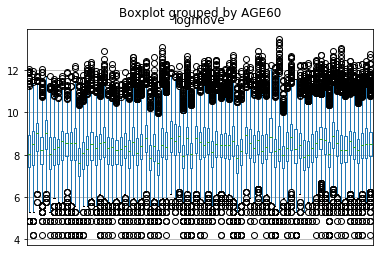

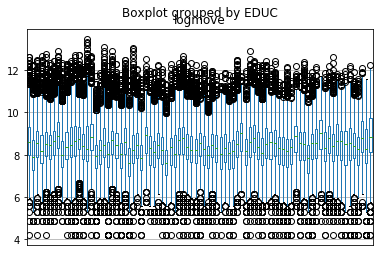

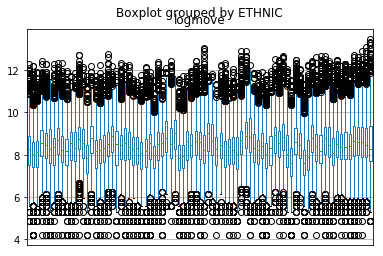

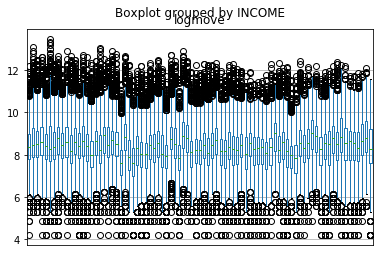

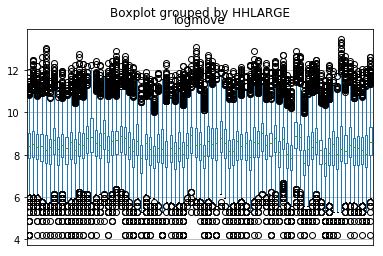

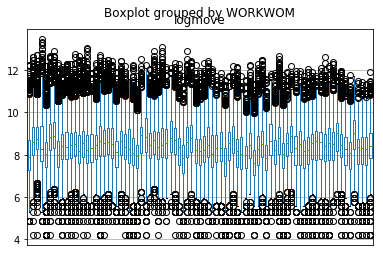

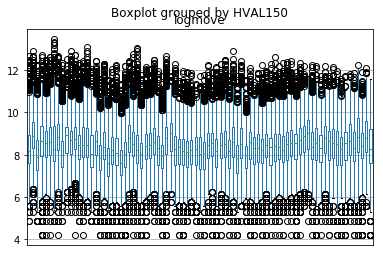

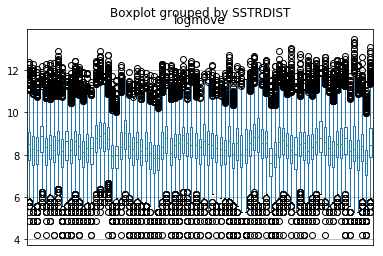

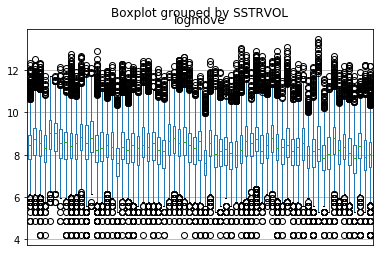

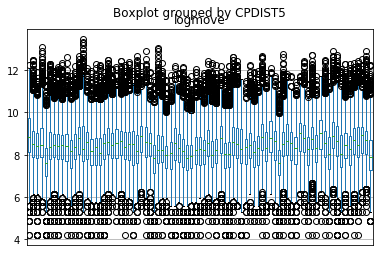

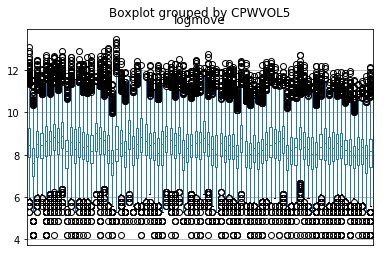

In [6]:
# initial conclusion: the correlation between the sales vs these store features seems week.
# store related features vs sales
for cl in store.columns[1:]:
    #plt.scatter(sales[cl], sales['logmove'])
    p = sales.boxplot(column='logmove', by=cl)
    p.axes.get_xaxis().set_visible(False)

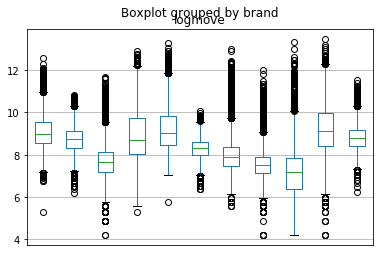

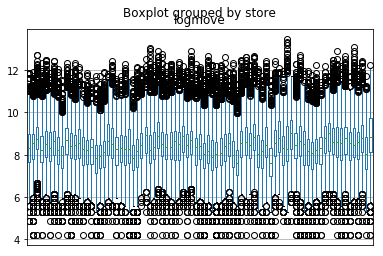

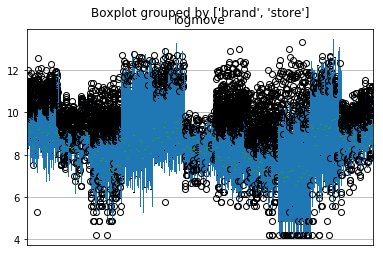

In [7]:
# sales across different brands and stores
for by_cl in ['brand', 'store', ['brand', 'store']]:
    p = sales.boxplot(column='logmove', by=by_cl)
    p.axes.get_xaxis().set_visible(False)

In [8]:
# autocorrealtion: weekly, monthly, quarterly, yearly
def single_autocorr(series, lag):
    """
    Autocorrelation for single data series
    :param series: traffic series
    :param lag: lag, days
    :return:
    """
    s1 = series[lag:]
    s2 = series[:-lag]
    ms1 = np.mean(s1)
    ms2 = np.mean(s2)
    ds1 = s1 - ms1
    ds2 = s2 - ms2
    divider = np.sqrt(np.sum(ds1 * ds1)) * np.sqrt(np.sum(ds2 * ds2))
    return np.sum(ds1 * ds2) / divider if divider != 0 else 0

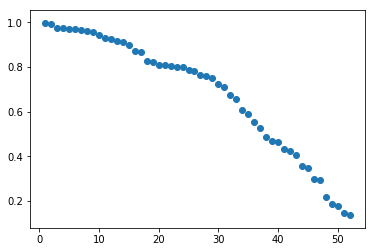

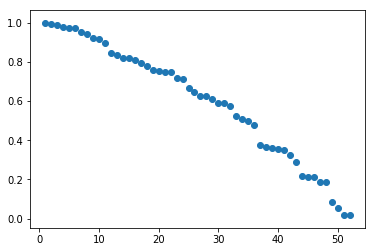

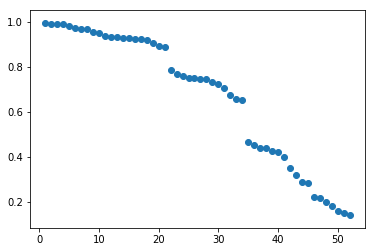

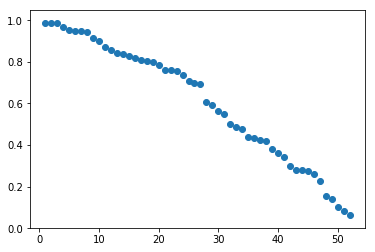

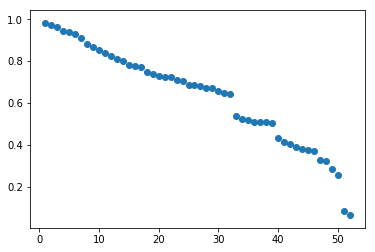

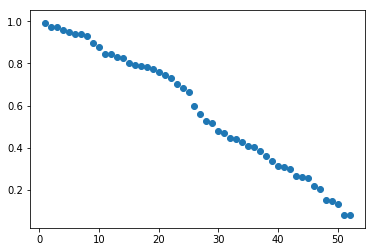

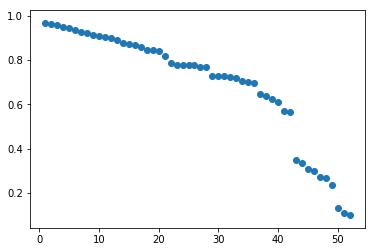

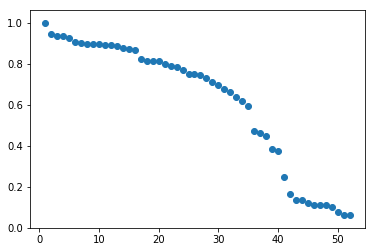

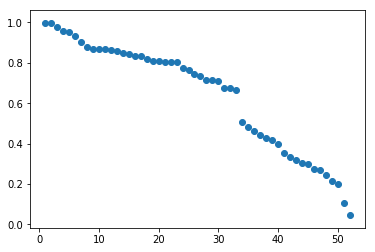

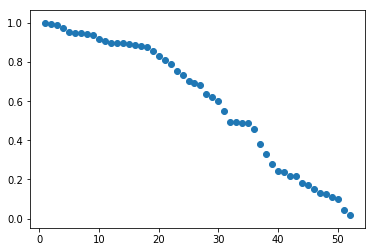

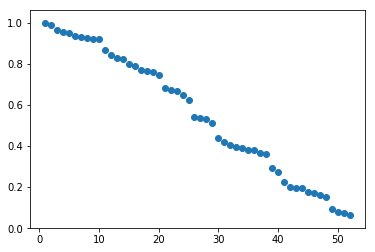

In [9]:
# monotonically decreasing, no strong seasonality pattern
max_store_limit = 1
store_list = sales['store'].unique()
brand_list = sales['brand'].unique()
l_range = range(1, 53)

for i in range(min(max_store_limit, len(store_list))):
    for j in range(len(brand_list)):
        store = store_list[i]
        brand = brand_list[j]
        d = sales.loc[(sales['store'] == store) & (sales['brand'] == brand)]
        cor = []
        for l in l_range:
            cor.append(single_autocorr(d['logmove'], l))
        plt.scatter(l_range, cor)
        plt.show()

In [10]:
for l in [13, 26, 39, 52]:
    print(l)
    print(sales.groupby(['store', 'brand']).apply(lambda x: single_autocorr(x['logmove'], l)).describe())

13
count    913.000000
mean       0.873807
std        0.047421
min        0.611930
25%        0.846118
50%        0.876367
75%        0.908974
max        0.982957
dtype: float64
26
count    913.000000
mean       0.709398
std        0.097350
min        0.245297
25%        0.663293
50%        0.721891
75%        0.771751
max        0.911748
dtype: float64
39
count    913.000000
mean       0.490408
std        0.127948
min        0.025220
25%        0.402703
50%        0.494810
75%        0.585219
max        0.822233
dtype: float64
52
count    913.000000
mean       0.160086
std        0.094159
min       -0.066287
25%        0.096271
50%        0.157706
75%        0.214962
max        0.525208
dtype: float64


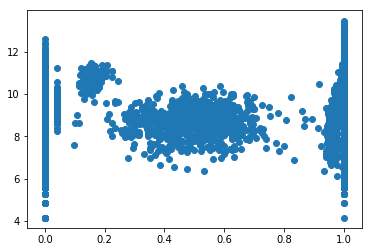

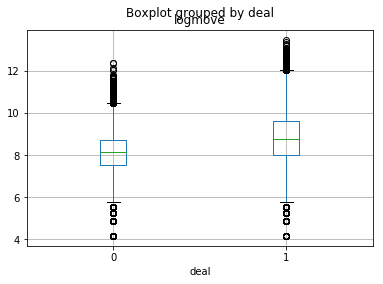

In [11]:
# correlation between deal, feat
plt.scatter(sales['feat'], sales['logmove'])
p = sales.boxplot(column='logmove', by='deal')

In [12]:
# correlation between the competitive prices
sales['price'] = sales.apply(lambda x: x.loc['price' + str(int(x.loc['brand']))], axis=1)
price_cols = ['price1', 'price2', 'price3', 'price4', 'price5', 'price6', 'price7', 'price8', 
                 'price9', 'price10', 'price11']
sales['avg_price'] = sales[price_cols].sum(axis=1).apply(lambda x: x / len(price_cols))
sales['price_ratio'] = sales.apply(lambda x: x['price'] / x['avg_price'], axis=1)

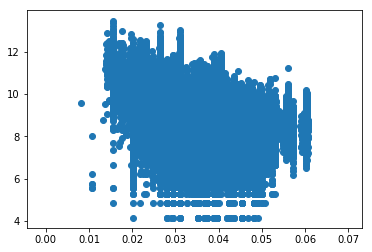

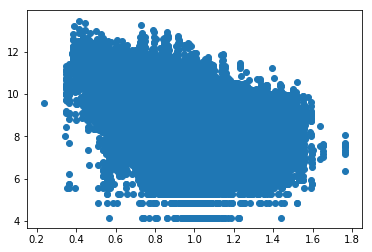

In [13]:
plt.scatter(sales['price'], sales['logmove'])
plt.show()
plt.scatter(sales['price_ratio'], sales['logmove'])
plt.show()

In [14]:
# read in the holiday information
week_decoder = pd.read_csv('week_decoder.csv', index_col=False)
sales = sales.merge(week_decoder, how='left', left_on='week', right_on='Week #')
sales['Start'] = pd.to_datetime(sales['Start'])
sales['End'] = pd.to_datetime(sales['End'])
sales['Special Events'] = sales['Special Events'].map(lambda x: x.strip())

In [15]:
print(sales['logmove'].describe())
sales.groupby(by='Special Events').apply(lambda x: x['logmove'].describe())

count    106139.000000
mean          8.417476
std           1.141371
min           4.158883
25%           7.699842
50%           8.392990
75%           9.049232
max          13.482016
Name: logmove, dtype: float64


logmove,count,mean,std,min,25%,50%,75%,max
Special Events,,,,,,,,
,88660.0,8.418506,1.134555,4.158883,7.714231,8.392990,9.041685,13.482016
4th of July,2475.0,8.282183,1.225836,4.158883,7.592870,8.302018,8.962904,11.859178
Christmas,1804.0,8.492180,1.177568,4.158883,7.714231,8.534640,9.284331,11.639875
Easter,1793.0,8.569481,1.435508,4.158883,7.624619,8.476371,9.300547,12.932577
Halloween,1793.0,8.296399,0.971076,4.158883,7.699842,8.184235,8.691483,11.578863
Labor Day,2574.0,8.389046,1.070722,4.158883,7.796469,8.378391,9.041685,11.417999
Memorial Day,1738.0,8.457200,1.077481,5.257495,7.655391,8.442446,9.176163,11.603716
New-Year,1749.0,8.542589,1.179606,5.545177,7.624619,8.601534,9.379239,11.638747
Presidents Day,1749.0,8.367503,1.324196,4.158883,7.491088,8.236421,8.929568,13.047916


In [30]:
def calc_deal_effect(df):
    return pd.Series(df.groupby(by='Special Events').apply(
        lambda x: x['logmove'].loc[x['deal'] == 1].median() / x['logmove'].loc[x['deal'] == 0].median()))

deal_effect = sales.groupby(['store', 'brand']).apply(lambda x: calc_deal_effect(x))
deal_effect = deal_effect.reset_index().rename(columns={0: 'deal_effect'})

In [35]:
tmp = deal_effect.groupby(by='Special Events').apply(
    lambda x: x['deal_effect'].loc[x['deal_effect'].notnull()].describe())
tmp.sort_values(by=['50%', '75%'])

deal_effect,count,mean,std,min,25%,50%,75%,max
Special Events,,,,,,,,
Thanksgiving,557.0,0.978489,0.098358,0.526671,0.952277,0.993408,1.036669,1.318398
Christmas,345.0,1.012900,0.095264,0.720987,0.951509,1.021780,1.068733,1.420975
Halloween,571.0,1.056156,0.126715,0.614449,0.988831,1.038053,1.105559,1.553655
4th of July,486.0,1.076535,0.136904,0.789459,0.991080,1.039699,1.128819,1.945404
New-Year,227.0,1.091232,0.129225,0.804017,1.006174,1.045810,1.160253,1.659516
,913.0,1.077604,0.047054,0.988322,1.041946,1.067922,1.107079,1.259424
Memorial Day,611.0,1.106959,0.100406,0.681532,1.046149,1.084727,1.154480,1.734995
Labor Day,668.0,1.109555,0.097002,0.892548,1.036420,1.102160,1.172965,1.548171
Presidents Day,491.0,1.137404,0.169572,0.706593,1.016331,1.110474,1.227487,2.097494


In [16]:
print(sales['deal'].describe())
sales.groupby(by='Special Events').apply(lambda x: x['deal'].describe())

count    106139.000000
mean          0.446999
std           0.497185
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: deal, dtype: float64


deal,count,mean,std,min,25%,50%,75%,max
Special Events,,,,,,,,
,88660.0,0.439025,0.496271,0.0,0.0,0.0,1.0,1.0
4th of July,2475.0,0.395960,0.489155,0.0,0.0,0.0,1.0,1.0
Christmas,1804.0,0.429601,0.495156,0.0,0.0,0.0,1.0,1.0
Easter,1793.0,0.485778,0.499937,0.0,0.0,0.0,1.0,1.0
Halloween,1793.0,0.586726,0.492559,0.0,0.0,1.0,1.0,1.0
Labor Day,2574.0,0.522922,0.499571,0.0,0.0,1.0,1.0,1.0
Memorial Day,1738.0,0.406789,0.491376,0.0,0.0,0.0,1.0,1.0
New-Year,1749.0,0.523156,0.499606,0.0,0.0,1.0,1.0,1.0
Presidents Day,1749.0,0.484277,0.499896,0.0,0.0,0.0,1.0,1.0


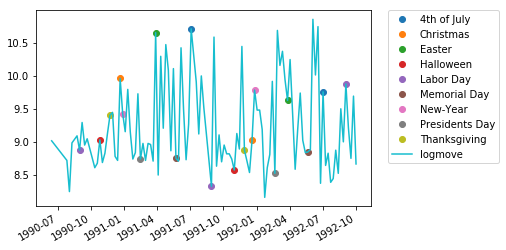

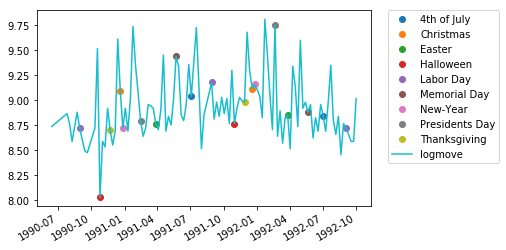

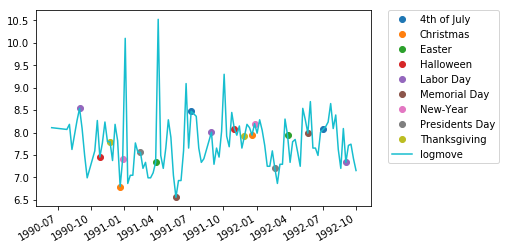

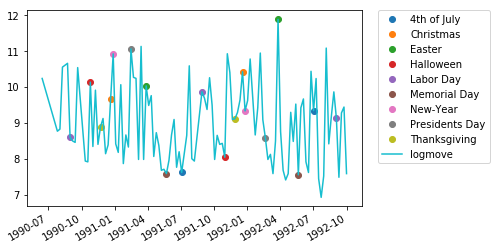

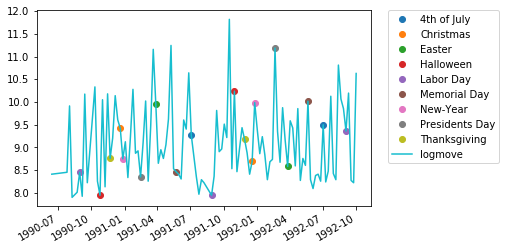

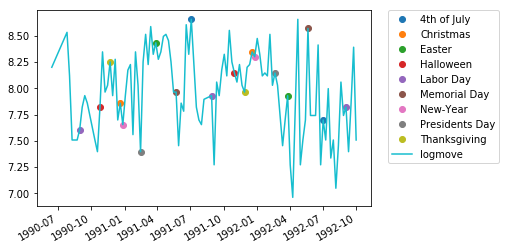

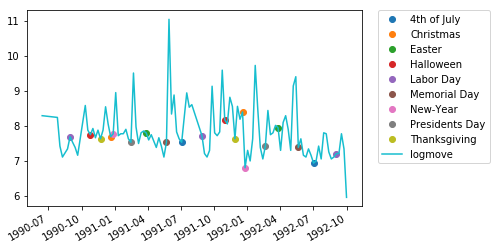

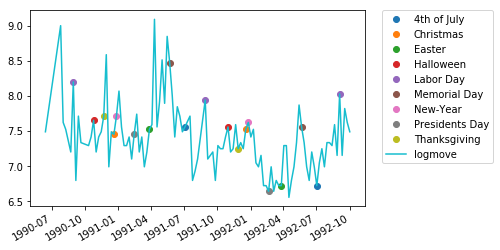

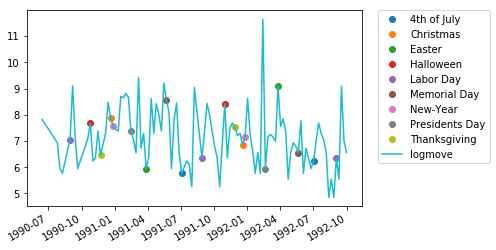

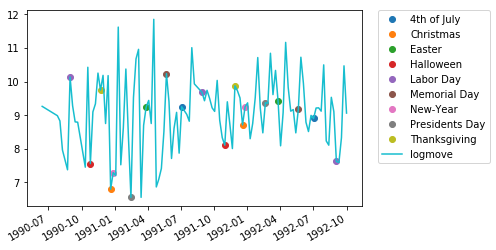

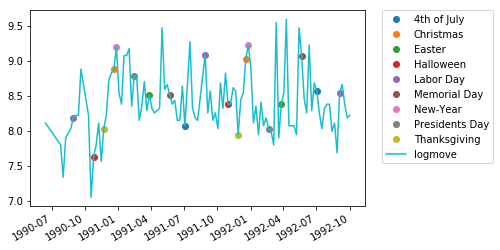

In [17]:
# plot the time series itself
# TODO: add holiday points
max_store_limit = 1
store_list = sales['store'].unique()
brand_list = sales['brand'].unique()
l_range = range(1, 53)

for i in range(min(max_store_limit, len(store_list))):
    for j in range(len(brand_list)):
        store = store_list[i]
        brand = brand_list[j]
        d = sales.loc[(sales['store'] == store) & (sales['brand'] == brand)]
        d_holiday = d.loc[d['Special Events'] != '']
        groups = d_holiday.groupby('Special Events')

        # Plot
        for name, group in groups:
            plt.plot(group['Start'], group['logmove'], 'o', label=name)
        plt.plot(d['Start'], d['logmove'])
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.gcf().autofmt_xdate()
        plt.show()